In [2]:
library(igraph) 
library(network) 
library(ggraph)
library(rgl)
library(networkD3)
library(visNetwork)

## Appendix on networks

This file is intended to be read as a summary of the graph mapping techniques attempted for visualizing the Authentifications dataset of the ATI, as part of the [main 'Attack detection and Kill-Chain classification' project](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection). To understand why you're reading this, make sure to visit the [section on data visualisation](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Alex/VisualEDAonAuths.ipynb).

We'll make use of a small synthetic dataset for illustrations:

In [3]:
set.seed(2)
x<- sample(c("Air", "Earth", "Water", "Fire"), size=25, replace=T)
y<- sample(c("Air", "Earth", "Water", "Fire"), size=25, replace=T)

Elem <- as.data.frame(cbind(x,y))
colnames(Elem) <- c("V1", "V2")
head(Elem, 10)

V1,V2
Air,Air
Water,Earth
Earth,Air
Earth,Fire
Fire,Fire
Fire,Water
Air,Earth
Air,Air
Air,Earth
Fire,Fire


**1. Igraph**

Igraph performed adequately well on most tasks. Most notably, Igraph was the only technique which consistently handled the large amounts of data we're working with and graphed the networks reasonably well such that they're informative to the naked eye. The large amounts of features to explore within the plotting, as well as cross compatibility with other libraries made Igraph the predominant option in the end. However, data as large as ours is little likely to be very informative regardless of chosen technique.

_Pros:_

- Informative networks, with plenty customization options.

- Adequate to decent handling of large data.

- Cross-compatibility with other libraries and graphing means.

- Different plotting outputs supported (tlkplot, rglplot); importantly the default R plot as well.

_Cons:_

- Demand increases worse than linearly to size, at least in some circumstances.

- Default settings tend to be uninformative on large scale networks.

Image pasted directly from the [main work referred](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Alex/VisualEDAonAuths.ipynb) :

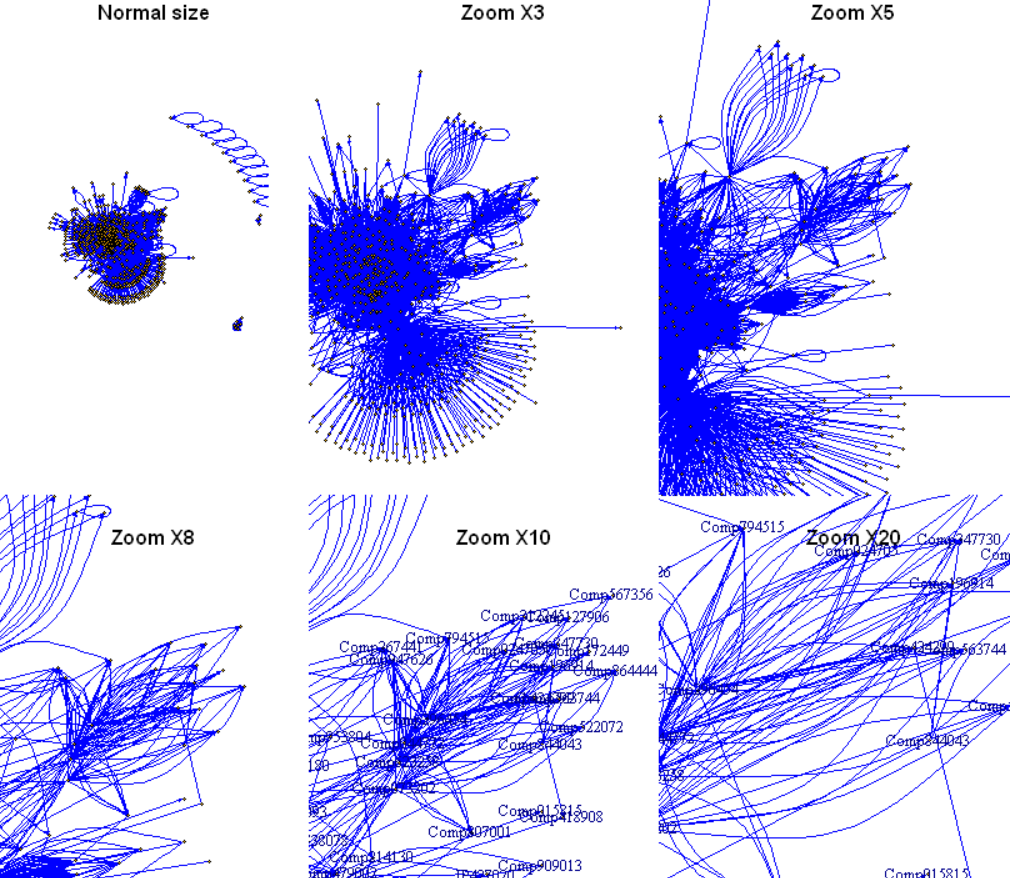

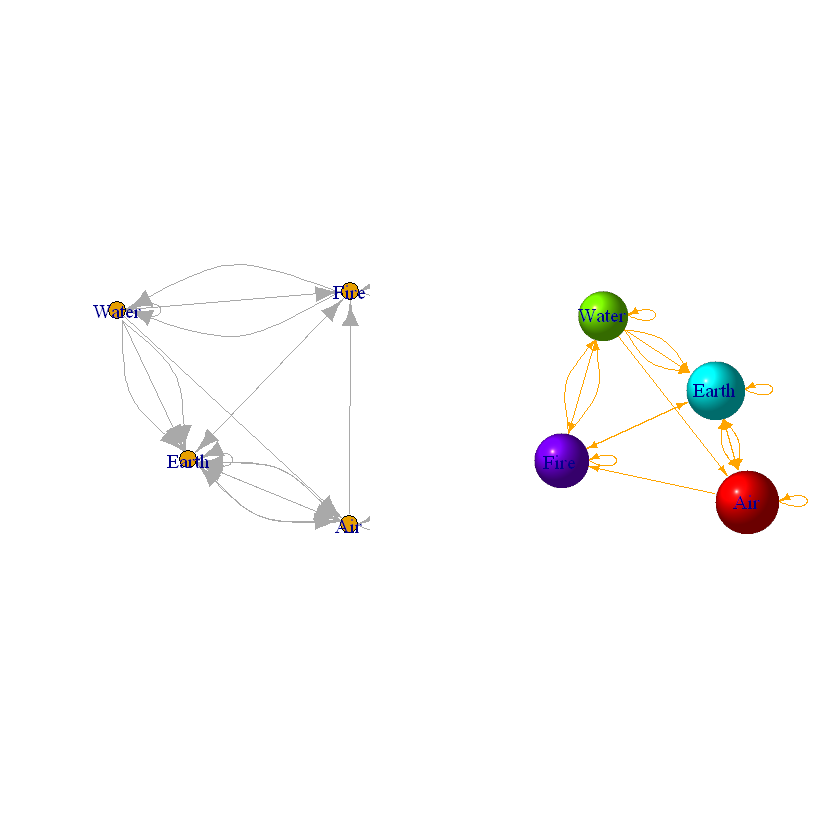

In [4]:
net<- graph_from_data_frame(Elem, directed=T)
op <- par(mfrow=c(1,2))
plot(net)
deg <- degree(net, mode="all")
V(net)$size <- deg*5
plot(net, vertex.shape="sphere", edge.color='orange', vertex.color=rainbow(4), edge.arrow.size=0.4)
par(op)

**2. Ggraph**</font>

Ggraph comes as a close 2nd alternative to Igraph. There are sections where it arguably performed better, such as raw interpretability, intuitive layout and familiarity to the ggplot() system. However, in any other respect, Igraph is heavily favoured. There are multiple core problems with the Ggraph library that make it a difficult choice for large scale networks especially, starting with memory complexity and nodes orientation.

_Pros:_

- Interpretability, intuitive layout and well understood mapping.

- Trivial implementation, similar to normal ggplot().

- Respectable amount of customization options, notably layout (much like Igraph).

_Cons:_

- Scales very poorly with the data.

- Has intrinsic problems handling non-simple networks (eg. loops or parallel edges), as well as nodes orientation on the output.

- Visuals become crowded quicker than Igraph, mainly due to output interface.


Using `stress` as default layout


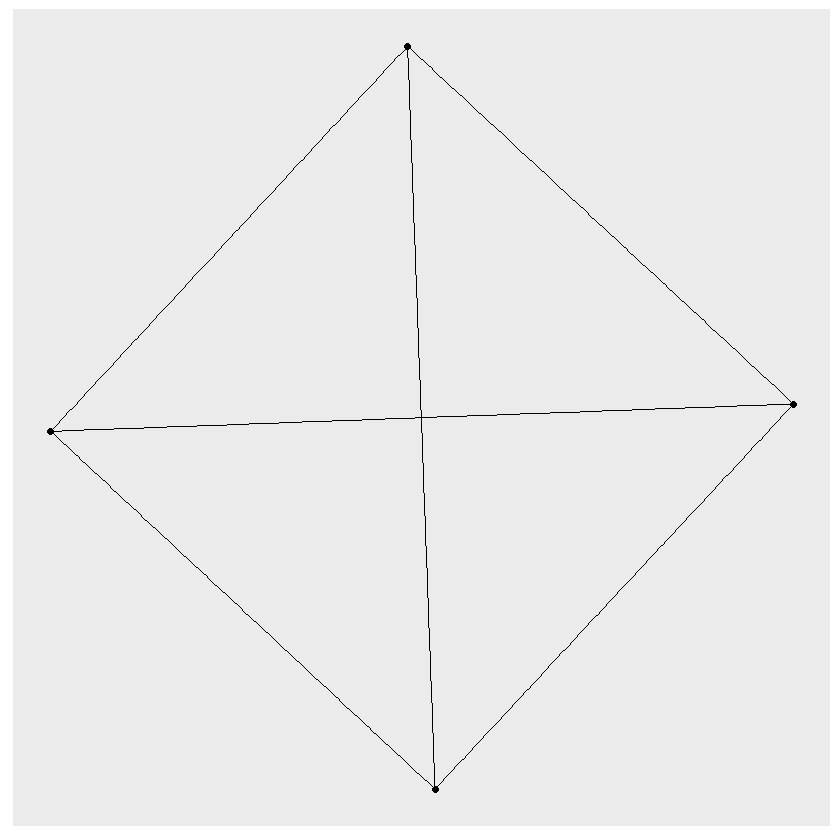

In [5]:
ggraph(net, layout='auto') + geom_edge_link()  + geom_node_point()

<font color='Fire'>**3. Rglplot**</font>

While it is a very interesting sight precisely for its 3D animation, it makes for an especially bad choice on any large dataset. If they load, visuals become absurdly crowded, and while there is interpretability provided you get to access the interface, you need an extremely strong device to handle it for more than seconds. Saving the results is also hard.

_Pros:_

- Amazing interpretability on very small or small datasets.

- Unique output layout.

_Cons:_

- NOT a choice to explore under any means on medium + sized datasets.

- Immense computational power required to handle, scaling far worse than linearly with size.

- Although aimed at interpretability, not much more informative than its 2D peers.

- Not compatible with all compilers and/or devices.

- Experimental. Aimed at 'fun' rather than usefulness. 

In [15]:
# rglplot(net)

_Note: The above line of code may crash within JupyterNotebook. Recommend running it within RStudio or other R editors instead. The result is plotted below:_

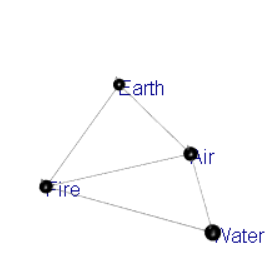



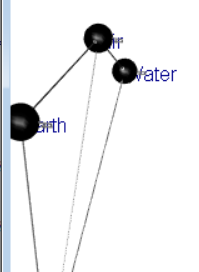

<font color='Orange'>**4. Network**</font>

Network is a moderately good alternative to Igraph. Unlike all other choices, it consistently deals with larger networks slightly better than Igraph itself does. The desirable scaling is obtained by an implicit transition to an adjacency matrix - so while the plotting takes less to be evaluated than all other graphing tools, defining the network will take longer at a linear scale with the size of the data.* 

_Pros:_

- Fast plotting with less computational demand than Igraph.

- Trades interpretability for aspect in many ways (eg. won't draw parallel edges, instead grows existing edges in width).

- Various options for customization.

- Offers an animated version as well as 3D versions with the help of a secondary package.

_Cons:_

- Trades interpretability for aspect in many ways (eg. won't draw parallel edges, instead grows existing edges in width).

- Defining the network takes the longest out of all techniques due to its construction.

- Less cross-compatibility with other packages than Igraph.


*_This is an observed phenomenon, not a factual information. Needs checking._

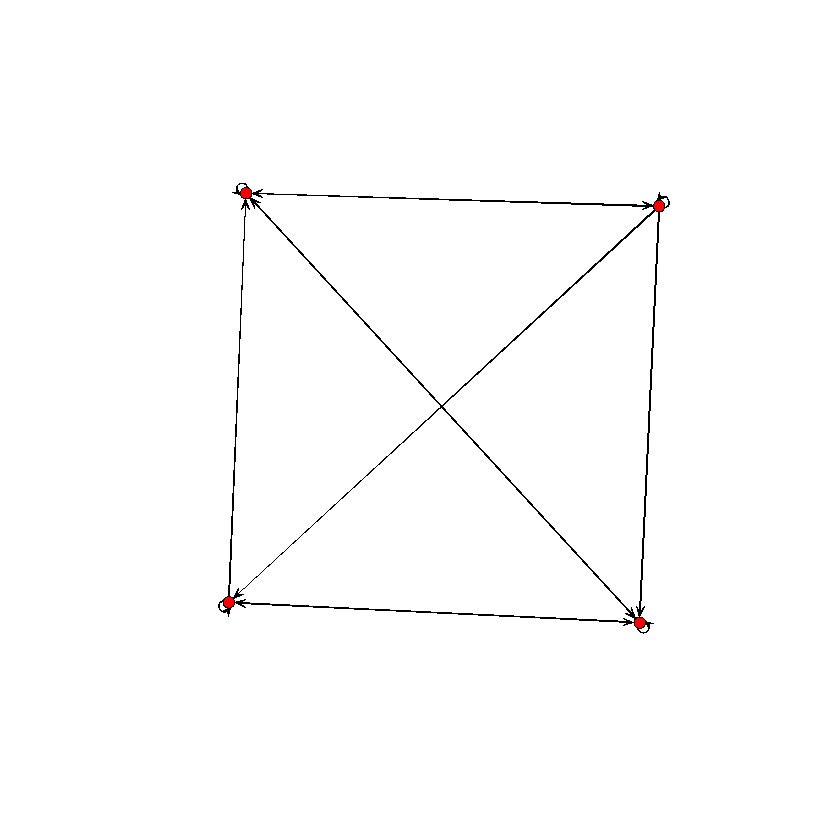

In [12]:
net2<- network(Elem, multiple=T, loops=T)
plot(net2)

**Conclusions**

Igraph is the standard and default method for graphing techniques. Alternatives such as Network and Ggraph exist and can circumstantially outperform Igraph depending on what's needed of your plot, but will rarely do so - especially due to Igraph's unparalleled compatibility with other techniques and packages. Some more experimental methods such as rglplot and animation (not explicitly mentioned here) exist and make up interesting visuals, but are heavily ill-advised when it comes to large networks due to how easily plots become convoluted and uninterpretable. 

**References**

[Main work on Visualisations for the ATI dataset](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Alex/VisualEDAonAuths.ipynb)

[On various graphing techniques in R](https://kateto.net/network-visualization)

[Igraph documentation](https://cran.r-project.org/web/packages/igraph/igraph.pdf)

[Ggraph documentation](https://cran.r-project.org/web/packages/ggraph/ggraph.pdf)

[Network documentation](https://www.rdocumentation.org/packages/network/versions/1.13.0/topics/network)

[Using rglplot](https://www.rdocumentation.org/packages/igraph/versions/0.2.1/topics/rglplot)